In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("2019order.csv")
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",52.60651629
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",109.5488722
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",81.75438596
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",174.3107769
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",167.2180451


In [22]:
df.isnull().any()

방송일시     False
노출(분)     True
마더코드     False
상품코드     False
상품명      False
상품군      False
판매단가     False
 취급액      True
판매수량     False
dtype: bool

In [23]:
df["노출(분)"]=df["노출(분)"].fillna(method='ffill')
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",52.60651629
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",109.5488722
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",81.75438596
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",174.3107769
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",167.2180451
...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN,0


In [24]:
df.rename(columns={' 취급액 ':'취급액'}, inplace = True)

In [25]:
df.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액', '판매수량'], dtype='object')

In [26]:
# 무형 데이터 추출
dfformless = df[df['상품군'] == "무형"]
dfformless

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
2318,2019-01-25 19:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN,#DIV/0!
2845,2019-01-31 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN,#DIV/0!
3332,2019-02-05 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN,#DIV/0!
6570,2019-03-09 0:00,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN,#DIV/0!
6571,2019-03-09 0:20,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN,#DIV/0!
...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN,0
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN,0


In [27]:
# df2에 무형데이터 제외한 데이터 삽입
idx_fl = df[df['상품군'] == "무형"].index
df2 = df.drop(idx_fl)
df2

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",52.60651629
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",109.5488722
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",81.75438596
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",174.3107769
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",167.2180451
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000",68.62837838
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000",286.1179775
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000",621.3809524
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000",87.12025316


In [28]:
# 판매단가 및 취급액 데이터 앞뒤공백제거
df2['판매단가']  = df2['판매단가'].str.strip()
df2['취급액']  = df2['취급액'].str.strip()
df2

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000",52.60651629
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000",109.5488722
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000",81.75438596
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000",174.3107769
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000",167.2180451
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000",68.62837838
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000",286.1179775
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000",621.3809524
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000",87.12025316


In [29]:
# 판매단가 및 취급액 데이터 앞뒤공백, ","제거
df2['판매단가']  = df2['판매단가'].str.replace(",","")
df2['취급액']  = df2['취급액'].str.replace(",","")
df2

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.60651629
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.5488722
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.75438596
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.3107769
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.2180451
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,68.62837838
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,286.1179775
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,621.3809524
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,87.12025316


In [30]:
df2.dtypes

방송일시      object
노출(분)    float64
마더코드       int64
상품코드       int64
상품명       object
상품군       object
판매단가      object
취급액       object
판매수량      object
dtype: object

In [33]:
#판매단가 및 취급액 데이터 int로 변환
df2[['판매단가','취급액','판매수량']] = df2[['판매단가','취급액','판매수량']].apply(pd.to_numeric)
df2

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매수량
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,52.606516
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,109.548872
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,81.754386
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,174.310777
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,167.218045
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000,68.628378
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000,286.117977
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000,621.380952
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000,87.120253


In [34]:
df2.dtypes

방송일시      object
노출(분)    float64
마더코드       int64
상품코드       int64
상품명       object
상품군       object
판매단가       int64
취급액        int64
판매수량     float64
dtype: object

In [37]:
grouped=df2['판매수량'].groupby(df2['상품군'])
grouped

In [43]:
t_df2=grouped.mean()
t_df2

상품군
가구       17.379483
가전       15.463927
건강기능    372.739295
농수축     972.194409
생활용품    174.314027
속옷      363.624486
의류      384.164614
이미용     801.696335
잡화      237.786101
주방      189.733096
침구      153.908400
Name: 판매수량, dtype: float64

In [46]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0, 0.5, '판매수량')

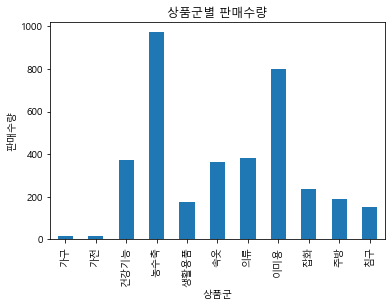

In [47]:
ax = t_df2.plot(kind='bar', title='상품군별 판매수량')
ax.set_xlabel('상품군')        
ax.set_ylabel('판매수량')     

In [48]:
grouped=df2['판매수량'].groupby(df2['노출(분)'])
grouped

In [49]:
time_df2=grouped.mean()
time_df2

노출(분)
2.0      358.896321
3.0      191.456180
5.0      196.940490
7.0      524.420417
9.0       32.474916
10.0     351.013664
11.0    1271.723028
12.0     120.968275
13.0     235.035934
14.0     324.914254
15.0     109.424848
16.0     152.371685
17.0     274.708563
18.0     660.448928
19.0     362.078770
20.0     309.505651
22.0     164.762984
23.0     137.968367
25.0      90.238899
26.0      89.562132
27.0     170.002055
30.0     179.664640
40.0     122.577479
Name: 판매수량, dtype: float64

Text(0, 0.5, '판매수량')

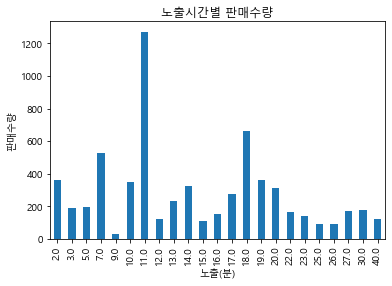

In [51]:
ax = time_df2.plot(kind='bar', title='노출시간별 판매수량')
ax.set_xlabel('노출(분)')        
ax.set_ylabel('판매수량')  

In [53]:
grouped=df2['판매수량'].groupby(df2['판매단가'])
grouped

In [54]:
time_df2=grouped.mean()
time_df2

판매단가
12800         9.453125
19900        57.939698
24900       148.741633
28900       343.773662
29000      1008.453179
              ...     
3690000       1.370912
3990000       0.681798
4250000       0.768863
5060000       3.416864
7930000       0.763388
Name: 판매수량, Length: 390, dtype: float64

Text(0, 0.5, '판매수량')

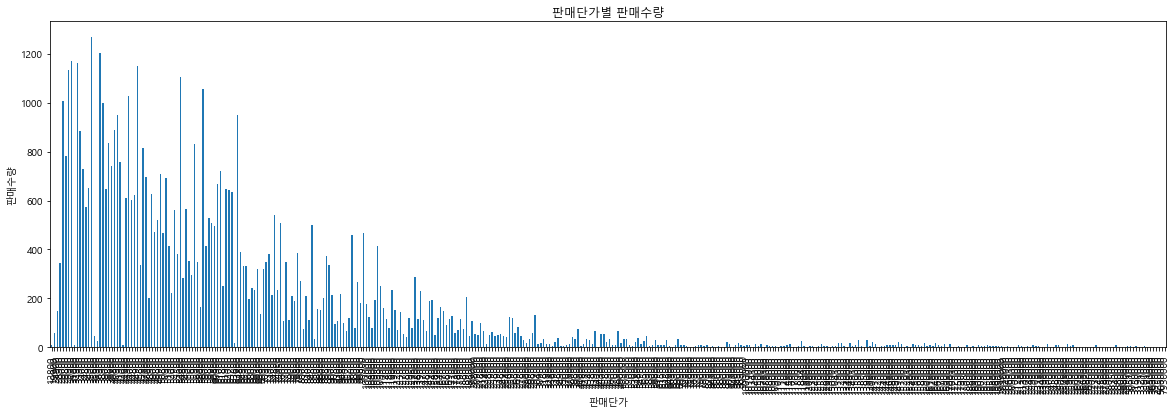

In [57]:
ax = time_df2.plot(kind='bar', title='판매단가별 판매수량',figsize=(20,6))
       
ax.set_ylabel('판매수량')  

In [ ]:
ax.set_xlabel('판매단가') 